### Loading data!

In [1]:
import pandas as pd

#Reading original data files
df_books = pd.read_csv(r'C:\Users\16508\Desktop\DATA-230-DATA_visualization\Book_recommendation_dataset\Books.info\Books.csv') 
df_users = pd.read_csv(r'C:\Users\16508\Desktop\DATA-230-DATA_visualization\Book_recommendation_dataset\Books.info\Ratingsinfo\Usersinfo\Users.csv') 
df_ratings = pd.read_csv(r'C:\Users\16508\Desktop\DATA-230-DATA_visualization\Book_recommendation_dataset\Books.info\Ratingsinfo\Ratings.csv') 


C:\Users\16508\anaconda3\envs\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

## Books dataset!

In [3]:
df_books.head(5)

,ISBN,Book-Title,Book-Author,Yop,Publisher,Genres
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,young adult
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,romance
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,classics
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,young adult
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,nonfiction


In [4]:
df_books.Yop.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [5]:
#Handlling Publisher null values 
df_books.loc[df_books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Yop,Publisher,Genres
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,horror
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,fiction


In [6]:
df_books.loc[(df_books.ISBN == '193169656X'), 'Publisher'] = 'other'
df_books.loc[(df_books.ISBN == '1931696993'), 'Publisher'] = 'other'

df_books.loc[(df_books.ISBN == '193169656X')]

,ISBN,Book-Title,Book-Author,Yop,Publisher,Genres
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,other,horror


In [7]:
# Testing if any null values
print(df_books.isnull().sum())

df_books.isnull().values.any()

# Conclusion: null values which need to be handled.

ISBN             0
Book-Title       0
Book-Author      1
Yop              0
Publisher        0
Genres         963
dtype: int64


True

In [8]:
# removing null values to avoid errors  
df_books.dropna(inplace = True)
# list of dtypes to include 
include =['object', 'float', 'int'] 
  
# calling describe method 
desc = df_books.describe( include = include)

In [9]:
# Testing if any null values
print(df_books.isnull().sum())

df_books.isnull().values.any()

# Conclusion: No null values which need to be handled.

ISBN           0
Book-Title     0
Book-Author    0
Yop            0
Publisher      0
Genres         0
dtype: int64


False

#### Fixing year of publication!

In [10]:
df_books.loc[df_books.Yop == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Yop,Publisher,Genres
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,romance
221678,789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,fiction


In [11]:
df_books.loc[df_books.ISBN == '789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
df_books.loc[df_books.ISBN == '789466953','Book-Author'] = "James Buckley"
df_books.loc[df_books.ISBN == '789466953','Yop'] = 2000
df_books.loc[df_books.ISBN == '789466953','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books.ISBN == '789466953','Genres'] = "romance"

df_books.loc[df_books.ISBN == '789466953',:]

,ISBN,Book-Title,Book-Author,Yop,Publisher,Genres
221678,789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,romance


In [12]:
df_books.loc[df_books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
df_books.loc[df_books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
df_books.loc[df_books.ISBN == '078946697X','Yop'] = 2000
df_books.loc[df_books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books.ISBN == '078946697X','Genres'] = "fiction"

df_books.loc[df_books.ISBN == '078946697X',:]

,ISBN,Book-Title,Book-Author,Yop,Publisher,Genres
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,fiction


In [13]:
df_books.loc[df_books.Yop == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Yop,Publisher,Genres
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,classics


In [14]:
df_books.loc[df_books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"
df_books.loc[df_books.ISBN == '2070426769', 'Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df_books.loc[df_books.ISBN == '2070426769', 'Yop'] = 2003
df_books.loc[df_books.ISBN == '2070426769','Publisher'] = "Gallimard"
df_books.loc[df_books.ISBN == '2070426769','Genres'] = "classics"

df_books.loc[df_books.ISBN == '2070426769']

,ISBN,Book-Title,Book-Author,Yop,Publisher,Genres
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,classics


In [15]:
df_books.Yop = pd.to_numeric(df_books.Yop)
df_books.Yop.unique()
#Con:- handdled misclassified values in year of publication.

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1989, 1984,    0, 1981, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [16]:
import numpy as np

#Removing years from yop column that are outliers and retaining only years till 2021
df_books.loc[(df_books.Yop > 2021) | (df_books.Yop == 0), 'Yop'] = np.NAN
df_books.Yop.fillna(round(df_books.Yop.mean()), inplace=True)
df_books.Yop = df_books.Yop.astype(np.int32)

In [17]:
print(sorted(df_books.Genres.unique()))

['academic', 'adult', 'adult fiction', 'adventure', 'animals', 'anthologies', 'art', 'asian literature', 'autobiography', 'biography', 'business', 'childrens', 'christian', 'christian fiction', 'christianity', 'classics', 'contemporary', 'crime', 'cultural', 'currency', 'dark', 'design', 'did not finish', 'economics', 'education', 'erotica', 'european literature', 'family', 'fan fiction', 'fantasy', 'feminism', 'fiction', 'food and drink', 'football', 'glbt', 'health', 'historical', 'history', 'holiday', 'horror', 'humor', 'inspirational', 'language', 'lds', 'leadership', 'lgbt', 'literature', 'love', 'magical realism', 'media tie in', 'modern', 'music', 'mystery', 'mythology', 'new adult', 'nonfiction', 'novels', 'paranormal', 'philosophy', 'plays', 'poetry', 'politics', 'polyamorous', 'psychology', 'race', 'realistic fiction', 'religion', 'romance', 'science', 'science fiction', 'self help', 'sequential art', 'shapeshifters', 'short stories', 'sociology', 'spirituality', 'sports', 's

##### Pre-processing of the Book dataset has been done!
#### Missing values have been handled and misclassified values have been set right

## User dataset!

In [18]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [19]:
df_users.columns = ['UserID', 'Location', 'Age']

In [20]:
# Testing if any null values
print(df_users.isnull().sum())

df_users.isnull().values.any()

# Conclusion:No null values which need to be handled.

UserID           0
Location         0
Age         110762
dtype: int64


True

In [21]:
print(sorted(df_users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [22]:
df_users.loc[(df_users.Age < 10) | (df_users.Age > 80), 'Age'] = np.nan 
df_users.Age = df_users.Age.fillna(df_users.Age.mean())
df_users.Age = df_users.Age.astype(np.int32)

In [23]:
df_users.Age.unique()

array([34, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78, 64, 12, 74, 75, 76, 68, 11,
       77, 70, 10])

## Rating dataset!

In [24]:
df_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [25]:
df_ratings.columns = ['UserID', 'ISBN', 'BookRating']

In [26]:
# Testing if any null values
print(df_ratings.isnull().sum())

df_ratings.isnull().values.any()

# Conclusion: No null values which need to be handled.

UserID        0
ISBN          0
BookRating    0
dtype: int64


False

In [27]:
print(sorted(df_ratings.BookRating.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


#### Find intersection between users dataset and books dataset
#### books.ISBN and users.userID

In [28]:
updated_ratings = df_ratings[df_ratings.ISBN.isin(df_books.ISBN)]
updated_ratings = updated_ratings[updated_ratings.UserID.isin(df_users.UserID)]

In [29]:
sparsity = 1.0 - len(updated_ratings) / float(df_users.shape[0]  * df_books.shape[0])
print(str(sparsity * 100) + '%')

99.99974019950136%


In [30]:
df_users["count"] = df_users['UserID']

In [31]:
df_users.head(20)
df_users.tail()

,UserID,Location,Age,count
278853,278854,"portland, oregon, usa",34,278854
278854,278855,"tacoma, washington, united kingdom",50,278855
278855,278856,"brampton, ontario, canada",34,278856
278856,278857,"knoxville, tennessee, usa",34,278857
278857,278858,"dublin, n/a, ireland",34,278858


In [32]:
explicit_ratings = updated_ratings[updated_ratings.BookRating != 0]
explicit_ratings.head(10)

,UserID,ISBN,BookRating
3,276729,052165615X,3
8,276744,038550120X,7
23,276747,1885408226,7
27,276751,3596218098,8
44,276762,3453092007,8
61,276772,3499230933,10
62,276772,3596151465,10
66,276774,3442136644,9
77,276786,8437606322,8
81,276786,8478442588,6


In [33]:
#merge df_books and explicit_ratings based on ISBN

#Cleaned_Dataset = pd.merge(df_books, explicit_ratings, on = "ISBN")
#Cleaned_Dataset.drop(['Book-Title', 'Book-Author', 'Yop', 'Publisher', 'ISBN'],axis=1,inplace=True)
#Cleaned_Dataset.columns = ['ISBN', 'UserID', 'BookRating']
#Cleaned_Dataset.head()

#df_books.to_csv('Cleaned_books.csv', index=False)
#Cleaned_Dataset.to_csv('Cleaned_users.csv', index=False)

#### If someone has not rated a book it just puts 0
#### we don't care about those and hence we will consider only ratings 1-10

In [34]:
user_explicit_rating = df_users[df_users.UserID.isin(explicit_ratings.UserID)]
user_explicit_rating.head()

,UserID,Location,Age,count
7,8,"timmins, ontario, canada",34,8
11,12,"fort bragg, california, usa",34,12
21,22,"erfurt, thueringen, germany",34,22
63,64,"lyon, rhone, france",32,64
68,69,"vancouver, british columbia, canada",34,69


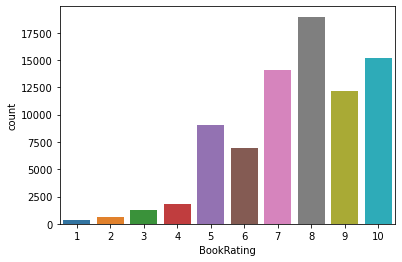

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

#Rating distribution
sns.countplot(data=explicit_ratings, x='BookRating')
plt.show()

Text(0, 0.5, 'Count')

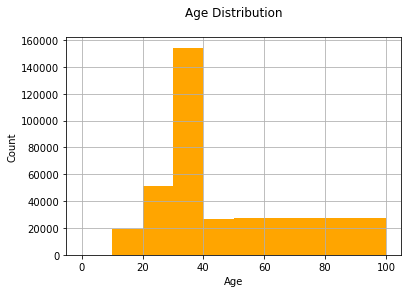

In [37]:
#Age distribution
df_users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100], color='Orange')
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')

In [39]:
#Top 10 most rated books
import pandas as pd

rating_count = pd.DataFrame(explicit_ratings.groupby('ISBN')['BookRating'].count())
top10 = rating_count.sort_values('BookRating', ascending=False).head(10)

top10_ratings = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336', '059035342X', '0142001740', '0446672211', '044023722X', '0452282152'], columns = ['ISBN'])
top10_books = pd.merge(top10_ratings, df_books, on='ISBN')
top10_books

,ISBN,Book-Title,Book-Author,Yop,Publisher,Genres
0,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,fantasy
1,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company,fantasy


In [40]:
#Average rating

average_rating = pd.DataFrame(explicit_ratings.groupby('ISBN')['BookRating'].mean())
average_rating['rating_count'] = pd.DataFrame(explicit_ratings.groupby('ISBN')['BookRating'].count())
average_rating.sort_values('rating_count', ascending=False).head(10)

,BookRating,rating_count
ISBN,,
059035342X,8.939297,313
044023722X,7.338078,281
067976402X,7.808594,256
044021145X,7.822115,208
043935806X,9.033981,206
1400034779,8.049180,183
044651652X,7.506579,152
044022165X,7.434783,138
1558743669,8.000000,134
